In [16]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error ,mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

In [17]:
df = pd.read_csv('Clean_Header_20190130.csv')

In [18]:
df.set_index('dates',inplace=True)

In [19]:
df.head(10)

,efficiency,asleep_min,awake_min,restless_min,timeInBed
dates,,,,,
2018-10-08,96.0,347.0,2.0,14.0,363.0
2018-10-09,93.0,337.0,4.0,21.0,362.0
2018-10-10,96.0,417.0,2.0,17.0,437.0
2018-10-11,96.0,417.0,2.0,17.0,437.0
2018-10-12,96.0,508.0,0.0,24.0,532.0
2018-10-13,96.0,417.0,2.0,17.0,437.0
2018-10-14,92.0,284.0,0.0,24.0,308.0
2018-10-15,96.0,415.0,2.0,16.0,433.0
2018-10-16,98.0,428.0,3.0,7.0,438.0


In [20]:
# df['asleep_rolling7'] = df['asleep_min'].rolling(7).mean()
df['restless_rolling7'] = df['restless_min'].rolling(7).mean()

df['awake_rolling7'] = df['awake_min'].rolling(7).mean()

In [21]:
df.fillna(0,inplace=True)

In [22]:
df.shape

(121, 7)

In [8]:
int(df.shape[0]*0.90)

108

In [28]:
## NO NEED TO RUN FOR THIS SIM
## bring in new caffeine ds here
caffe = pd.read_csv('cleaned_caffeine.csv')

caffe.drop(columns=['Unnamed: 0'],inplace = True)

ds = pd.merge(df, caffe, how = 'left', left_on = df.index, right_on = 'dates')

ds.set_index('dates',inplace=True)

ds
# want to use 1/7 forward for linear regression & gradient boosted tree.  
ds.to_csv('data_for_modeling_cleaned_20190204.csv')

In [23]:
train = df['2018-10-14':'2019-01-12']
test = df['2019-01-12':]

In [24]:
train.shape, test.shape

((100, 7), (16, 7))

In [25]:
df['dayofweek']=df.index
df['dayofweek']=[ pd.to_datetime(i).weekday() for i in df['dayofweek']]

In [26]:
df.head()

,efficiency,asleep_min,awake_min,restless_min,timeInBed,restless_rolling7,awake_rolling7,dayofweek
dates,,,,,,,,
2018-10-08,96.0,347.0,2.0,14.0,363.0,0.0,0.0,0
2018-10-09,93.0,337.0,4.0,21.0,362.0,0.0,0.0,1
2018-10-10,96.0,417.0,2.0,17.0,437.0,0.0,0.0,2
2018-10-11,96.0,417.0,2.0,17.0,437.0,0.0,0.0,3
2018-10-12,96.0,508.0,0.0,24.0,532.0,0.0,0.0,4


In [27]:
features = ['asleep_min', 'awake_min', 'restless_min', 'restless_rolling7', 'awake_rolling7']
train = train[features]
test = test[features]

train.shape, test.shape

((100, 5), (16, 5))

In [15]:
### how to predict 1 variable based on 1 dataset

In [51]:
ar_eff = ARIMA(endog = train, order = (1,0,0))
model = ar_eff.fit()
preds = model.predict(start = '101', end = '115')
mean_squared_error(test['asleep_min'],preds)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

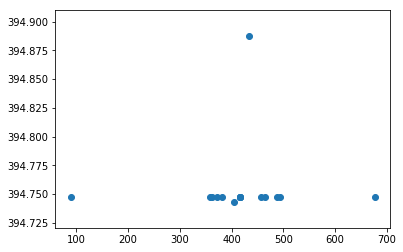

In [16]:
plt.scatter(test['asleep_min'], preds)